#Google play store
## Nguyễn Thị Mỹ Duyên

# Show data

In [1]:
import pandas as pd

data = pd.read_csv("google-play-store.csv")
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [2]:
info = data.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [3]:
describe = data.describe()
describe

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# Preprocessing data

There is some NaN value, we need to replace NaN value with mean value.

In [4]:
import numpy as np
data = data.replace("", np.nan)
# Impute the missing values with mean imputation
data.fillna(data.mean(), inplace=True)
print(data.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64


In [5]:
# Iterate over each column of data
for col in data.columns:
    if data[col].dtypes == 'object':
        data = data.fillna(data[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print(data.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [6]:
# Strange data "3.0M" appear in Reviews column
records = data[data["Reviews"] == "3.0M"]
records

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,ROBLOX,"February 11, 2018",1.0.19,4.0 and up,ROBLOX


In [7]:
# Drop the line 10472
data = data.drop(data.index[10472])
data = data.drop(data.index[9148])

# Change data type of Reviews column to int
data["Reviews"]= data["Reviews"].astype(int) 
data["Reviews"].dtype

dtype('int64')

In [8]:
# Change the strange data of Price column
price = data["Price"]
lst_price = []
for index in price:
  if index != "0":
    lst_price.append(index.replace(index, index[1:]))
  else:
    lst_price.append(index)
data["Price"] = lst_price

data[data["Price"] != "0"]["Price"]

234       4.99
235       4.99
290       4.99
291       4.99
427       3.99
         ...  
10735     0.99
10760     7.99
10782    16.99
10785     1.20
10798     1.04
Name: Price, Length: 800, dtype: object

In [9]:
# Change data type of Price column to float
data["Price"]= data["Price"].astype(float) 
data["Price"].dtype

dtype('float64')

In [10]:
# Change data type of Installs column to int
installs = data["Installs"]
lst_install = []
for index in installs:
  if index == "0":
    lst_install.append( index )
  else:
    lst_install.append( index.replace(index, index[:-1]).replace(",",""))
data["Installs"] = lst_install
data["Installs"]= data["Installs"].astype(int)
print(data["Installs"])


0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10839, dtype: int64


In [11]:
# Check info
info = data.info()
info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          10839 non-null  float64
 3   Reviews         10839 non-null  int64  
 4   Size            10839 non-null  object 
 5   Installs        10839 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  float64
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10839 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


# Plot data analysis

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Checking the number of Apps available on playstore based on category


Text(0.5, 1.0, 'Number of Apps available based on Category')

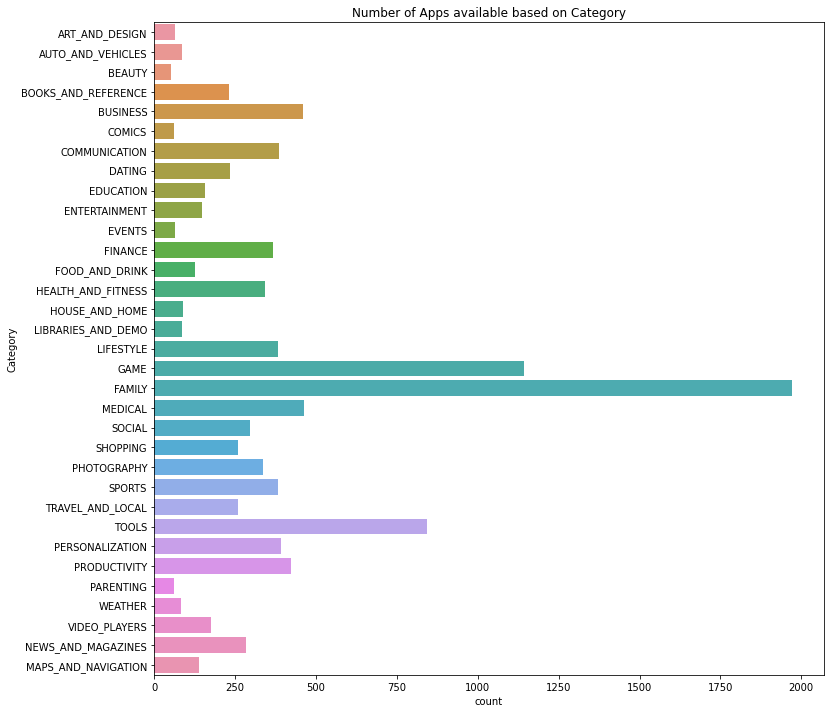

In [13]:
plt.figure(figsize=(12,12))
sns.countplot(y='Category',data=data)
plt.title("Number of Apps available based on Category")

## 2. Distribution between Free and Paid app

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


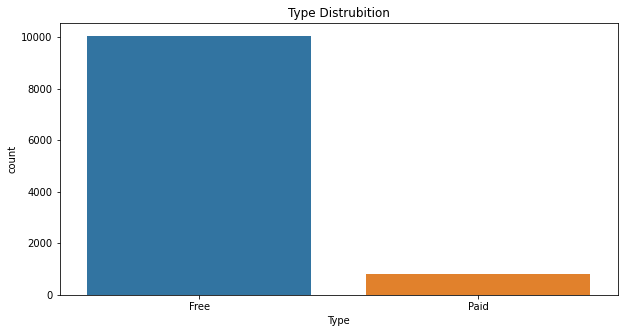

In [14]:
#histogram
plt.figure(figsize=(10,5))
sns.countplot(data["Type"]);
plt.title("Type Distrubition")
plt.show()

## 3. Most download  Paid apps

In [15]:
#Most download  Paid apps
df_type=data[data['Type']=='Paid']
df_type.sort_values(by='Installs',ascending=False)['App'].head(20)

2241                                             Minecraft
4034                                         Hitman Sniper
4347                                             Minecraft
3403                                 Beautiful Widgets Pro
9170                         Stickman Legends: Shadow Wars
2912                                   Facetune - For Free
10682                                  Fruit Ninja Classic
2883                                   Facetune - For Free
6675                                  Infinity Dungeon VIP
3405                                            HD Widgets
9941                                                Tasker
5631                               Five Nights at Freddy's
9165     League of Stickman 2018- Ninja Arena PVP(Dream...
5578                               Sleep as Android Unlock
5490                                            True Skate
4260                                     Cut the Rope GOLD
9151                               Lost Journey (Dreamsk